In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 13}
mpl.rc('font', **font)
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 2

In [3]:
import image_class_new as im
#reload(im)

In [14]:
im_obj = im.read_fits('fits/HD142666.model480_tw1100.image.fits')

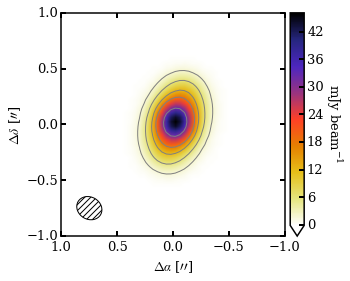

In [15]:
#cmap = 'Spectral_r'
#cmap = 'ocean_r'
cmap ='CMRmap_r'

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
cs = im_obj.plot_one_channel(fig,ax,xlim=1.,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
     plot_contour=True,contour_level=[2,6,12,18,32],c_colors='grey')
im.add_color_bar(fig,ax,cs,xoffset=-0.08,aspect=20)

fig.savefig('HD142666.model480_tw1100.image.pdf')

In [6]:
fits_file = glob.glob('fits/*.fits')
print fits_file

['fits/HD142666.band6.cal.time_freq_avg.spw0.r0.5.image.fits', 'fits/HD142666.model480_tw1100.image.fits', 'fits/HD142666.model480_tw1100_obs-mod_residual.image.fits', 'fits/HD142666.model480_tw400.image.fits', 'fits/HD142666.model480_tw400_obs-mod_residual.image.fits']


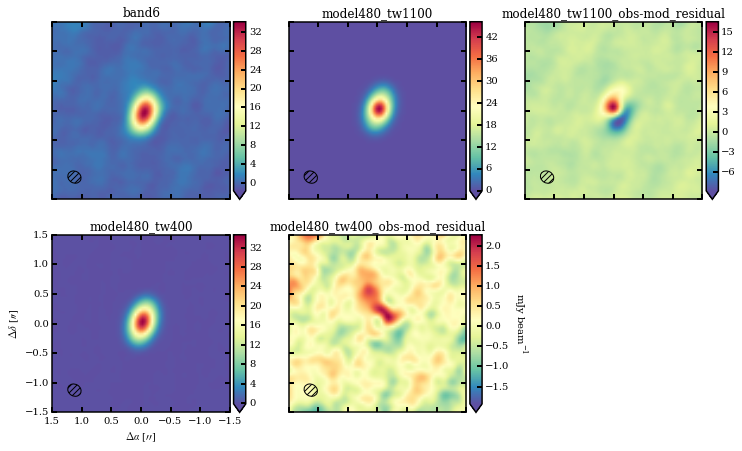

In [19]:
fig = plt.figure(figsize=(12,7))
nrow,ncol=2,3
cmap = 'Spectral_r'

for i in range(len(fits_file)):
    ax = fig.add_subplot(nrow,ncol,i+1)
    im_obj = im.read_fits(fits_file[i])
    name = fits_file[i].split('fits/')[1]
    name = name.split('.')[1]
    cs = im_obj.plot_one_channel(fig,ax,xlim=1.5,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
    plot_contour=False,contour_level=[2,6,12,18,32],c_colors='grey')    
        
    ax.set_title(name)
    
    if (i != (nrow-1)*ncol):
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels(())
        ax.set_yticklabels(())
    else:
        ax.set_xlabel(r'$\Delta\alpha$ [$\prime\prime$]')
        ax.set_ylabel(r'$\Delta\delta$ [$\prime\prime$]')
        
    if i!=4:
        im.add_color_bar(fig,ax,cs,xoffset=-0.03,aspect=25,ylabel='')
    else:
        im.add_color_bar(fig,ax,cs,xoffset=-0.03,aspect=25,ylabel='mJy beam$^{-1}$')
